<a href="https://colab.research.google.com/github/thayush56-glitch/demo-repo/blob/main/Pyoma2examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1


In [2]:
!pip install numpy
!pip install pyOMA-2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7

access data and exact results of system where first output array representing accelaration time histories, second an array representing input excitation provided to Dof with noise, third output exact output in terms of modal parameters from modal analysis


In [3]:
import os
import sys
import numpy as np
# Add the directory we execute the script from to path:
sys.path.insert(0, os.path.realpath('__file__'))

# import the function to generate the example dataset
from pyoma2.functions.gen import example_data

# generate example data and results
data, U, ground_truth = example_data()

# Print the exact results
np.set_printoptions(precision=3)
print(f"the natural frequencies are: {ground_truth[0]} \n")
print(f"the damping is: {ground_truth[1]} \n")
print("the (column-wise) mode shape matrix: \n"
f"{ground_truth[2]} \n")

the natural frequencies are: [0.89  2.598 4.095 5.261 6.   ] 

the damping is: 0.02 

the (column-wise) mode shape matrix: 
[[-0.117  0.108  0.09   0.064  0.033]
 [-0.108  0.033 -0.064 -0.117 -0.09 ]
 [-0.09  -0.064 -0.108  0.033  0.117]
 [-0.064 -0.117  0.033  0.09  -0.108]
 [-0.033 -0.09   0.117 -0.108  0.064]] 



Single setup class(blueprint) passing dataset and sampling frequency as arguments


In [5]:
from pyoma2.setup.single import SingleSetup

simp_5dof = SingleSetup(data, fs=100)

analyze the data need to initiate the desired algorithm to use name and desired arguments

In [6]:
from pyoma2.algorithms.fdd import FDD
from pyoma2.algorithms.ssi import SSI

# Initialise the algorithms
fdd = FDD(name="FDD", nxseg=2**11, method_SD="per")
ssidat = SSI(name="SSIdat", method="dat", br=30, ordmax=50, step=2)

# Add algorithms to the class
simp_5dof.add_algorithms(fdd, ssidat)

# run
simp_5dof.run_all()

2026-02-26 13:06:59,922 - pyoma2.setup.base - INFO - Running FDD... (base:123)
INFO:pyoma2.setup.base:Running FDD...
2026-02-26 13:07:00,525 - pyoma2.setup.base - INFO - Running SSIdat... (base:123)
INFO:pyoma2.setup.base:Running SSIdat...
2026-02-26 13:07:00,529 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:89)
INFO:pyoma2.functions.ssi:Assembling Hankel matrix method: dat...
2026-02-26 13:07:04,440 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:462)
INFO:pyoma2.functions.ssi:SSI for increasing model order...
100%|██████████| 26/26 [00:00<00:00, 2564.06it/s]
2026-02-26 13:07:04,470 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:628)
INFO:pyoma2.functions.ssi:Calculating modal parameters for increasing model order...
100%|██████████| 26/26 [00:00<00:00, 399.19it/s]
2026-02-26 13:07:04,785 - pyoma2.setup.base - INFO - all done (base:102)
INFO:pyoma2.setup.base:all done


Check results

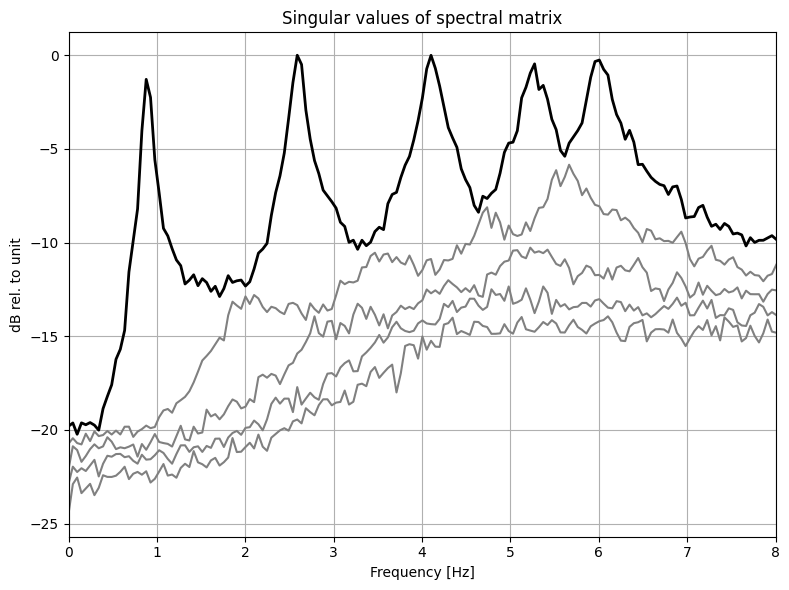

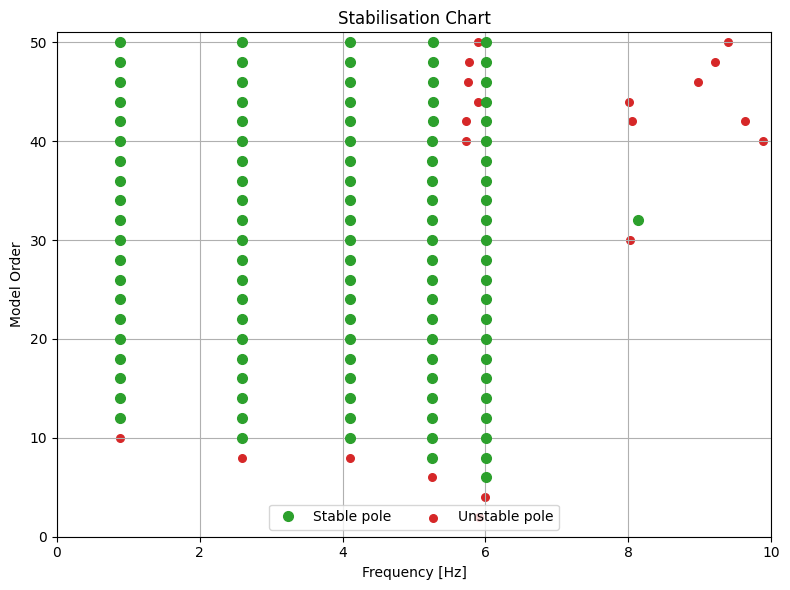

In [8]:
# plot singular values of the spectral density matrix
_, _ = fdd.plot_CMIF(freqlim=(0,8))

# plot the stabilisation diagram
_, _ = ssidat.plot_stab(freqlim=(0,10),hide_poles=False)

get modal parameters with the help of an interactive plot calling the mpe_from_plot method or we can get results manually with mpe() method

In [20]:

simp_5dof.mpe("SSIdat", sel_freq=[0.89, 2.598, 4.095, 5.261, 6.], order_in=30)

2026-02-26 13:16:25,486 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:149)
INFO:pyoma2.setup.base:Getting mpe modal parameters from SSIdat
2026-02-26 13:16:25,489 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1036)
INFO:pyoma2.functions.ssi:Extracting SSI modal parameters
100%|██████████| 5/5 [00:00<00:00, 4328.49it/s]


Now access all the results and compare to the exact values

In [21]:
# dict of results
ssidat_res = dict(ssidat.result)

# print the results
print(f"order out: {ssidat_res['order_out']} \n")
print(f"the natural frequencies are: {ssidat_res['Fn']} \n")
print(f"the dampings are: {ssidat_res['Xi']} \n")
print("the (column-wise) mode shape matrix:")
print(f"{ssidat_res['Phi'].real} \n")

order out: 30 

the natural frequencies are: [0.886 2.593 4.099 5.253 6.008] 

the dampings are: [0.02  0.018 0.019 0.021 0.021] 

the (column-wise) mode shape matrix:
[[ 1.    -0.909  0.781 -0.538  0.278]
 [ 0.914 -0.279 -0.545  1.    -0.763]
 [ 0.759  0.549 -0.917 -0.291  1.   ]
 [ 0.539  1.     0.296 -0.758 -0.915]
 [ 0.291  0.761  1.     0.922  0.55 ]] 



#REAL DATASET

dataset from a real building, dynamic identification carried out in 2019, 6 channels of accelaration data sampled at 100 Hz. APTF20, link for info about data collection and dataset provided.

In [22]:

import numpy as np
from pyoma2.algorithms import FSDD, SSI, pLSCF
from pyoma2.setup import SingleSetup
from pyoma2.support.utils.sample_data import get_sample_data

# load example dataset for single setup
data = np.load(get_sample_data(filename="Palisaden_dataset.npy", folder="palisaden"), allow_pickle=True)

2026-02-26 14:02:20,956 - pyoma2.support.utils.sample_data - INFO - Downloading Palisaden_dataset.npy from GitHub... (sample_data:38)
INFO:pyoma2.support.utils.sample_data:Downloading Palisaden_dataset.npy from GitHub...
2026-02-26 14:02:21,849 - pyoma2.support.utils.sample_data - INFO - Downloaded Palisaden_dataset.npy successfully. (sample_data:47)
INFO:pyoma2.support.utils.sample_data:Downloaded Palisaden_dataset.npy successfully.


proceed instantiate  singlesetup class, passing dataset and sampling frequency as parameters

In [23]:
# create single setup
Pali_ss = SingleSetup(data, fs=100)